In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and preprocessing dataset

In [ ]:
df = pd.read_csv('cirrhosis.csv')

In [ ]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


high correlation between independent variables isn't present, moving on

In [ ]:
!pip install scikit-survival -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 48.2 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sksurv.preprocessing import OneHotEncoder

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
int_columns = df.select_dtypes(include=['int64']).columns
print(int_columns)
for column in int_columns:
    df[column] = df[column].astype(float)
df.shape()

Index(['ID', 'N_Days', 'Age'], dtype='object')


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    float64
 1   N_Days         418 non-null    float64
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    float64
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
df['Drug'].unique()

array(['D-penicillamine', 'Placebo', nan], dtype=object)

In [ ]:
df['Ascites'].unique()

array(['Y', 'N', nan], dtype=object)

In [ ]:
df['Edema'].unique()

array(['Y', 'N', 'S'], dtype=object)

In [ ]:
df['Drug'] = df['Drug'].fillna('None')
df['Ascites'] = df['Ascites'].fillna('N')
df['Edema']= df['Edema'].fillna('N')
df['Spiders'] = df['Spiders'].fillna('N')
df['Hepatomegaly'] = df['Hepatomegaly'].fillna('N')

In [ ]:
float_columns = df.select_dtypes(include=['float64']).columns
for column in float_columns:
    column_mean = df[column].mean()
    df[column] = df[column].fillna(column_mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    float64
 1   N_Days         418 non-null    float64
 2   Status         418 non-null    object 
 3   Drug           418 non-null    object 
 4   Age            418 non-null    float64
 5   Sex            418 non-null    object 
 6   Ascites        418 non-null    object 
 7   Hepatomegaly   418 non-null    object 
 8   Spiders        418 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [ ]:
df['Status'] = df['Status'].replace({'C': 0, 'CL': 0, 'D': 1})

df['Status'] = df['Status'].astype('float64')
df.head(20)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1.0,400.0,1.0,D-penicillamine,21464.0,F,Y,Y,Y,Y,14.5,261.000000,2.60,156.0,1718.0,137.95,172.000000,190.00000,12.2,4.0
1,2.0,4500.0,0.0,D-penicillamine,20617.0,F,N,Y,Y,N,1.1,302.000000,4.14,54.0,7394.8,113.52,88.000000,221.00000,10.6,3.0
2,3.0,1012.0,1.0,D-penicillamine,25594.0,M,N,N,N,S,1.4,176.000000,3.48,210.0,516.0,96.10,55.000000,151.00000,12.0,4.0
3,4.0,1925.0,1.0,D-penicillamine,19994.0,F,N,Y,Y,S,1.8,244.000000,2.54,64.0,6121.8,60.63,92.000000,183.00000,10.3,4.0
4,5.0,1504.0,0.0,Placebo,13918.0,F,N,Y,Y,N,3.4,279.000000,3.53,143.0,671.0,113.15,72.000000,136.00000,10.9,3.0
5,6.0,2503.0,1.0,Placebo,24201.0,F,N,Y,N,N,0.8,248.000000,3.98,50.0,944.0,93.00,63.000000,257.02457,11.0,3.0
6,7.0,1832.0,0.0,Placebo,20284.0,F,N,Y,N,N,1.0,322.000000,4.09,52.0,824.0,60.45,213.000000,204.00000,9.7,3.0
7,8.0,2466.0,1.0,Placebo,19379.0,F,N,N,N,N,0.3,280.000000,4.00,52.0,4651.2,28.38,189.000000,373.00000,11.0,3.0
8,9.0,2400.0,1.0,D-penicillamine,15526.0,F,N,N,Y,N,3.2,562.000000,3.08,79.0,2276.0,144.15,88.000000,251.00000,11.0,2.0
9,10.0,51.0,1.0,Placebo,25772.0,F,Y,N,Y,Y,12.6,200.000000,2.74,140.0,918.0,147.25,143.000000,302.00000,11.5,4.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1.0,400.0,1.0,0,21464.0,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2.0,4500.0,0.0,0,20617.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3.0,1012.0,1.0,0,25594.0,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4.0,1925.0,1.0,0,19994.0,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5.0,1504.0,0.0,2,13918.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    float64
 1   N_Days         418 non-null    float64
 2   Status         418 non-null    float64
 3   Drug           418 non-null    int64  
 4   Age            418 non-null    float64
 5   Sex            418 non-null    int64  
 6   Ascites        418 non-null    int64  
 7   Hepatomegaly   418 non-null    int64  
 8   Spiders        418 non-null    int64  
 9   Edema          418 non-null    int64  
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [ ]:
mixed_columns = df.select_dtypes(include=['int64']).columns
for column in mixed_columns:
    df[column] = df[column].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    float64
 1   N_Days         418 non-null    float64
 2   Status         418 non-null    float64
 3   Drug           418 non-null    float64
 4   Age            418 non-null    float64
 5   Sex            418 non-null    float64
 6   Ascites        418 non-null    float64
 7   Hepatomegaly   418 non-null    float64
 8   Spiders        418 non-null    float64
 9   Edema          418 non-null    float64
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [ ]:
df['Stage'].unique()

array([4.        , 3.        , 2.        , 1.        , 3.02427184])

In [ ]:
!pip install lifelines -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.7 MB/s eta 0:00:00


# Estimation of mortality rate

We are going to do KM to look whether this dataset provides adequate results for survival rate, then we use Nelson-Aalen estimator for the mortality rate plot and then get the slope coefficient by fitting linear regression to this plot.

First version: time from diagnosis in days

In [ ]:
new_df = df[['ID', 'Status', 'N_Days']]
new_df = new_df.rename(columns={'Status': 'E'})
new_df = new_df.rename(columns={'N_Days': 'T'})

In [ ]:
from lifelines import KaplanMeierFitter
T = new_df['T']
km = KaplanMeierFitter(alpha=0.05) #alpha - level of significance for confidence interval estimation, see below.
km.fit(T)
km.event_table.head(7)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,418,418
41.0,2,2,0,0,418
43.0,1,1,0,0,416
51.0,1,1,0,0,415
71.0,1,1,0,0,414
77.0,1,1,0,0,413
94.0,1,1,0,0,412


In [ ]:
test = km.event_table
test['p'] = 1 - test['removed'] / test['at_risk']
test['S'] = test['p'].cumprod()
test.head(7)

,removed,observed,censored,entrance,at_risk,p,S
event_at,,,,,,,
0.0,0,0,0,418,418,1.000000,1.000000
41.0,2,2,0,0,418,0.995215,0.995215
43.0,1,1,0,0,416,0.997596,0.992823
51.0,1,1,0,0,415,0.997590,0.990431
71.0,1,1,0,0,414,0.997585,0.988038
77.0,1,1,0,0,413,0.997579,0.985646
94.0,1,1,0,0,412,0.997573,0.983254


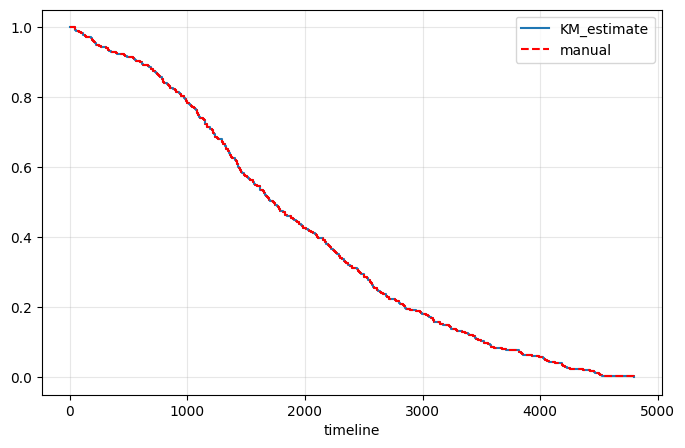

In [ ]:
ax = km.plot_survival_function(figsize=(8,5), ci_show=False)
ax.step(test.index, test['S'], where='post', label='manual', ls='--', color='red')
ax.legend();
ax.grid(alpha=0.3);

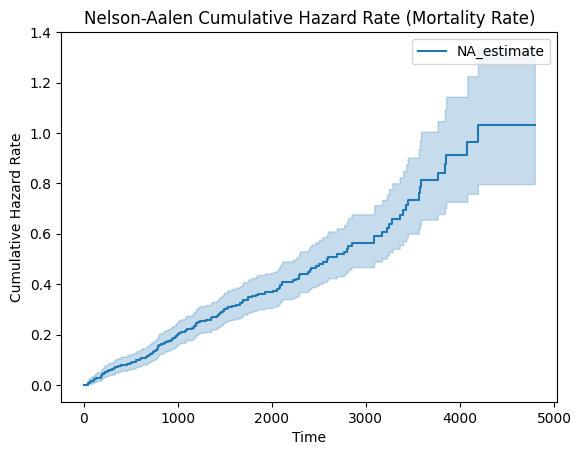

In [ ]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(new_df['T'], event_observed=new_df['E'])

naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')

plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression

time_points = naf.cumulative_hazard_.index.values[naf.cumulative_hazard_.index.values > 0]
cumulative_hazard_values = naf.cumulative_hazard_.values[naf.cumulative_hazard_.index.values > 0]

log_cumulative_hazard_values = np.log(cumulative_hazard_values)

regression_model = LinearRegression()
regression_model.fit(time_points.reshape(-1, 1), log_cumulative_hazard_values)

k = regression_model.coef_[0]
b = regression_model.intercept_

print("Slope (k):", k)
print("Intercept (b):", b)

Slope (k): [0.00068754]
Intercept (b): [-2.54197028]


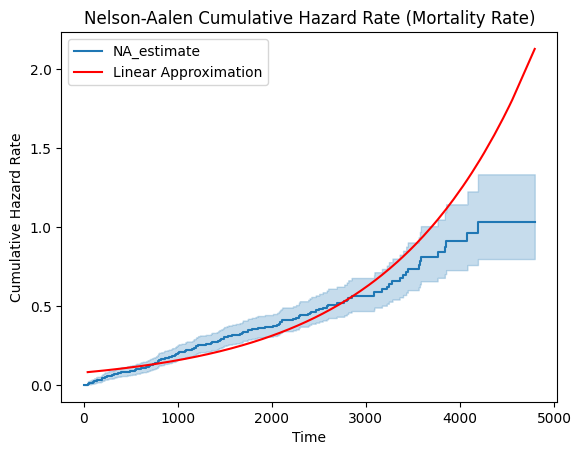

In [ ]:
naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')

plt.plot(time_points, np.exp(regression_model.predict(time_points.reshape(-1, 1))), label='Linear Approximation', color='red')



plt.legend()
plt.show()

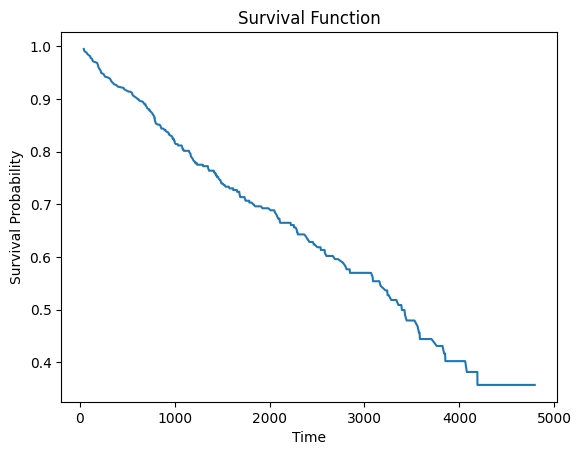

In [ ]:
survival_function = np.exp(-cumulative_hazard_values)
plt.plot(time_points, survival_function)
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Function')
plt.show()

Second option: time from diagnosis in years

In [ ]:
n_df = new_df.copy()
n_df['T'] = n_df['T'] / 365.25

In [ ]:
new_df.head(30)

,ID,E,T
0,1.0,1.0,400.0
1,2.0,0.0,4500.0
2,3.0,1.0,1012.0
3,4.0,1.0,1925.0
4,5.0,0.0,1504.0
5,6.0,1.0,2503.0
6,7.0,0.0,1832.0
7,8.0,1.0,2466.0
8,9.0,1.0,2400.0
9,10.0,1.0,51.0


In [ ]:
n_df.head(30)

,ID,E,T
0,1.0,1.0,1.095140
1,2.0,0.0,12.320329
2,3.0,1.0,2.770705
3,4.0,1.0,5.270363
4,5.0,0.0,4.117728
5,6.0,1.0,6.852841
6,7.0,0.0,5.015743
7,8.0,1.0,6.751540
8,9.0,1.0,6.570842
9,10.0,1.0,0.139630


Slope (k): [0.25112485]
Intercept (b): [-2.54197028]


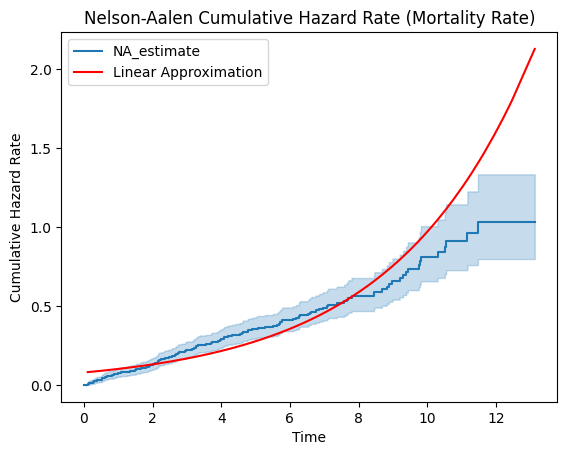

In [ ]:


naf.fit(n_df['T'], event_observed=n_df['E'])
time_points = naf.cumulative_hazard_.index.values[naf.cumulative_hazard_.index.values > 0]
cumulative_hazard_values = naf.cumulative_hazard_.values[naf.cumulative_hazard_.index.values > 0]

log_cumulative_hazard_values = np.log(cumulative_hazard_values)

regression_model = LinearRegression()
regression_model.fit(time_points.reshape(-1, 1), log_cumulative_hazard_values)

k = regression_model.coef_[0]
b = regression_model.intercept_

print("Slope (k):", k)
print("Intercept (b):", b)

naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')
plt.plot(time_points, np.exp(regression_model.predict(time_points.reshape(-1, 1))), label='Linear Approximation', color='red')



plt.legend()
plt.show()


In [ ]:
new1_df = df[['ID', 'Status', 'Age']]
new1_df = new1_df.rename(columns={'Status': 'E'})
new1_df = new1_df.rename(columns={'Age': 'T'})

Third option: age in years

In [ ]:
new1_df['T'] = new1_df['T'] / 365.25

In [ ]:
new1_df.head(30)

,ID,E,T
0,1.0,1.0,58.765229
1,2.0,0.0,56.446270
2,3.0,1.0,70.072553
3,4.0,1.0,54.740589
4,5.0,0.0,38.105407
5,6.0,1.0,66.258727
6,7.0,0.0,55.534565
7,8.0,1.0,53.056810
8,9.0,1.0,42.507871
9,10.0,1.0,70.559890


In [ ]:
T = new1_df['T']
km = KaplanMeierFitter(alpha=0.05) #alpha - level of significance for confidence interval estimation, see below.
km.fit(T)
km.event_table.head(7)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,0,0,0,418,418
26.277892,1,1,0,0,418
28.884326,1,1,0,0,417
29.555099,1,1,0,0,416
30.275154,1,1,0,0,415
30.573580,1,1,0,0,414
30.863792,1,1,0,0,413


In [ ]:
test = km.event_table
test['p'] = 1 - test['removed'] / test['at_risk']
test['S'] = test['p'].cumprod()
test.head(7)

,removed,observed,censored,entrance,at_risk,p,S
event_at,,,,,,,
0.000000,0,0,0,418,418,1.000000,1.000000
26.277892,1,1,0,0,418,0.997608,0.997608
28.884326,1,1,0,0,417,0.997602,0.995215
29.555099,1,1,0,0,416,0.997596,0.992823
30.275154,1,1,0,0,415,0.997590,0.990431
30.573580,1,1,0,0,414,0.997585,0.988038
30.863792,1,1,0,0,413,0.997579,0.985646


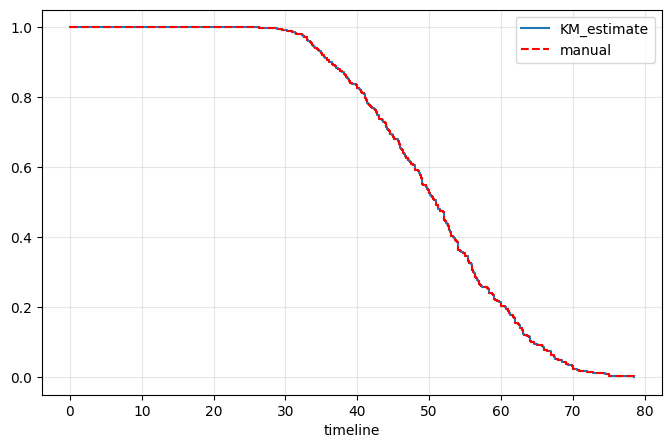

In [ ]:
ax = km.plot_survival_function(figsize=(8,5), ci_show=False)
ax.step(test.index, test['S'], where='post', label='manual', ls='--', color='red')
ax.legend();
ax.grid(alpha=0.3);

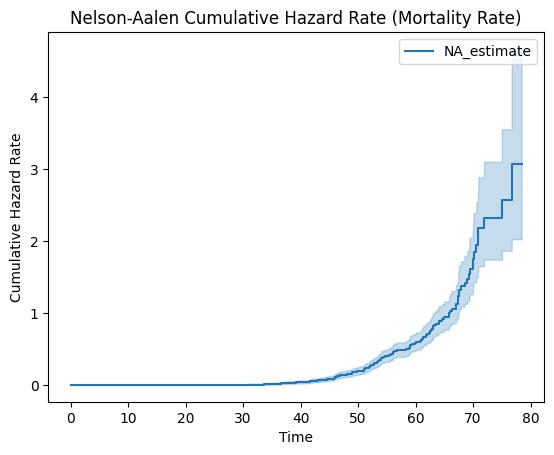

In [ ]:
naf = NelsonAalenFitter()
naf.fit(new1_df['T'], event_observed=new1_df['E'])

naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')

plt.show()

In [ ]:
time_points = naf.cumulative_hazard_.index.values[naf.cumulative_hazard_.index.values > 0]
cumulative_hazard_values = naf.cumulative_hazard_.values[naf.cumulative_hazard_.index.values > 0]

log_cumulative_hazard_values = np.log(cumulative_hazard_values + 7e-2)

regression_model = LinearRegression()
regression_model.fit(time_points.reshape(-1, 1), log_cumulative_hazard_values)

k = regression_model.coef_[0]
b = regression_model.intercept_

print("Slope (k):", k)
print("Intercept (b):", b)

Slope (k): [0.0874981]
Intercept (b): [-5.65743877]


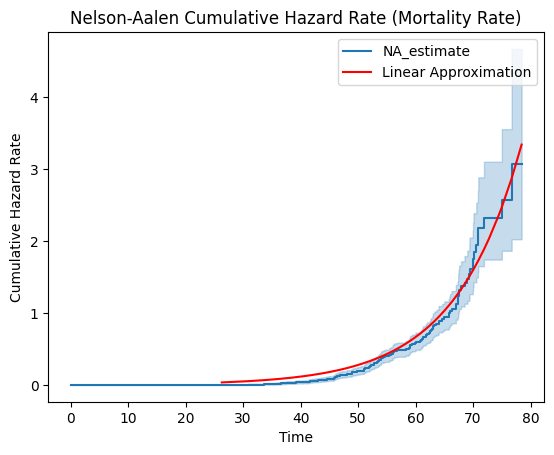

In [ ]:
naf.plot()
plt.title('Nelson-Aalen Cumulative Hazard Rate (Mortality Rate)')
plt.xlabel('Time')
plt.ylabel('Cumulative Hazard Rate')

plt.plot(time_points, np.exp(regression_model.predict(time_points.reshape(-1, 1))), label='Linear Approximation', color='red')



plt.legend()
plt.show()

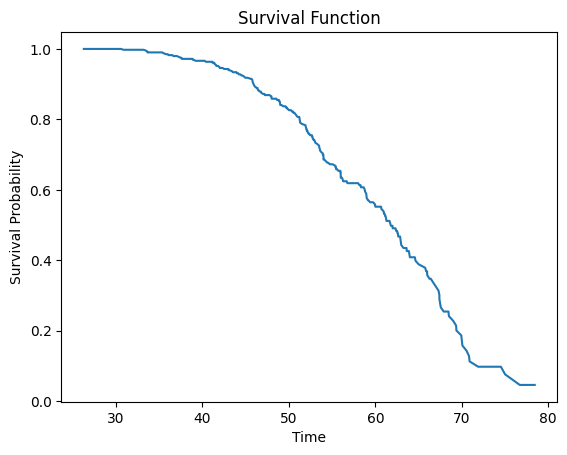

In [ ]:
survival_function = np.exp(-cumulative_hazard_values)
plt.plot(time_points, survival_function)
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Function')
plt.show()